# Hands On: Data Quality and Pre-Processing

### 1. Assessing Data Quality

Load the following packages: dplyr, na.tools, tidyimpute (version from github
decisionpatterns/tidyimpute”)
Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of
each car

In [1]:
# Install and load the devtools package (if not already installed)
if (!require(devtools)) {
  install.packages("devtools")
}
library(devtools)
install.packages("DescTools")

# Install the tidyimpute package from GitHub
install_github("decisionpatterns/tidyimpute")

# Load the required packages
library(dplyr)
library(na.tools)
library(tidyimpute)
library(DescTools)

Loading required package: devtools

Loading required package: usethis

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




na.tools (NA -> 0.3.1) [CRAN]


Installing 1 packages: na.tools

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpOBAJve/remotese666170f8/decisionpatterns-tidyimpute-9e07748/DESCRIPTION’
─  preparing ‘tidyimpute’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘tidyimpute_0.2.0.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load the carInsurance data set about the insurance risk rating of cars based on several characteristics of
each car

In [2]:
# Load the data from "data.Rdata"
load("/kaggle/input/carinsurance/carInsurance.Rdata") 

head(carIns)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


(a) Check if there are any missing values.
Tip: use the function any_na().


In [3]:
# Check for missing values in the dataframe
has_missing <- anyNA(carIns)

# Print the result
if (has_missing) {
  cat("The dataframe has missing values.")
} else {
  cat("The dataframe does not have any missing values.")
}

The dataframe has missing values.

(b) Count the number of cases that have, at least, one missing value.
Tip: use the function filter_any_na() and then count().



In [4]:
# Filter cases with at least one missing value and count the number of cases
count_missing <- carIns %>%
  filter_any_na() %>%
  count()

# Print the count
cat("Number of cases with at least one missing value:", count_missing$n)

# Print the length of the dataset
cat("\nDataset length:", nrow(carIns))

Number of cases with at least one missing value: 159
Dataset length: 205

(c) Create a new data set by removing all the cases that have missing values.
Tip: use the function drop_rows_any_na()


In [5]:
# Create a new data set by removing cases with missing values
imputed_drop_any <- drop_rows_any_na(carIns)

# Print the length of the dataset
cat("\nDataset length:", nrow(imputed_drop_any))


Dataset length: 159

(d) Create a new data set by imputing all the missing values with 0.
Tip: explore the variants of the function impute()


In [6]:
# Create a new data set by imputing missing values with 0
imputed_missing_values <- impute(carIns, method = "fixed", value = 0)
head(imputed_missing_values)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


(e) Create a new data set by imputing the mean in all the columns which have double type values.


In [7]:
# Impute mean in double-type columns
imputed_mean <- carIns %>%
  mutate(across(.cols = where(is.double), ~ if_else(is.na(.), mean(., na.rm = TRUE), .)))
# Display the head of the imputed data
head(imputed_mean)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,NA,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


(f) Create a new data set by imputing the mode in all the columns which have integer type values.


In [8]:
# Impute mode in integer-type columns
imputed_mode <- carIns %>%
  mutate(across(.cols = where(is.integer), ~ ifelse(is.na(.), Mode(.[!is.na(.)]), .)))

# Display the head of the imputed data
head(imputed_mode)

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,161,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,161,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,161,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


(g) Create a new data set by imputing the most frequent value to the column ”nDoors”.
Tip: use the function impute_replace()


In [9]:
 # Copy carIns
imputed_data_most_frequent <- carIns
summary(carIns$nDoors)
# Calculate the most frequent value
most_frequent_value <- carIns %>%
  count(nDoors) %>%
  arrange(desc(n)) %>%
  pull(nDoors) %>%
  first()

# Replace all values in "nDoors" column with the most frequent value
imputed_data_most_frequent$nDoors <- most_frequent_value

imputed_data_most_frequent$nDoors[is.na(imputed_data_most_frequent$nDoors)] <- most_frequent_value
summary(imputed_data_most_frequent$nDoors)
head(imputed_data_most_frequent)

four  two NA's 
 114   89    2

four  two 
 205    0

symb,normLoss,make,fuelType,aspiration,nDoors,bodyStyle,driveWheels,engineLocation,wheelBase,⋯,engineSize,fuelSystem,bore,stroke,compressionRatio,horsePower,peakRpm,cityMpg,highwayMpg,price
<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
3,NA,alfa-romero,gas,std,four,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
3,NA,alfa-romero,gas,std,four,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,NA,alfa-romero,gas,std,four,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
2,NA,audi,gas,std,four,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


(h) Combine the three last imputations to obtain a final dataset. Are there any duplicated cases?
Tip: use the functions distinct() and count()

In [10]:
# Select columns from imputed_mean (double columns)
imputed_mean_selected <- select(imputed_mean, where(is.double))

# Select columns from impute_mode (integer columns)
impute_mode_selected <- select(imputed_mode, where(is.integer))

# Select nDoors column from imputed_data_most_frequent
imputed_data_most_frequent_selected <- select(imputed_data_most_frequent, nDoors)

# Select columns that are not double, not integer, and column name is not "nDoors"
rest_columns <- select(carIns, -where(is.double), -where(is.integer), -nDoors)

# Combine the selected columns into a single dataset
final_data <- cbind(imputed_mean_selected, impute_mode_selected, imputed_data_most_frequent_selected,rest_columns)
# Check for duplicated cases
duplicated_cases <- final_data %>%
  distinct() %>%
  count() %>%
  filter(n > 1)

# Print the duplicated cases, if any
if (nrow(duplicated_cases) > 0) {
    print("Duplicated")
    print(duplicated_cases)
} else {
  print("No duplicated cases")
}

head(final_data)
summary(final_data)

[1] "Duplicated"
    n
1 205


,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,nDoors,make,fuelType,aspiration,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,four,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
2,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,four,alfa-romero,gas,std,convertible,rwd,front,dohc,four,mpfi
3,94.5,171.2,65.5,52.4,2.68,3.47,9.0,1,161,2823,⋯,four,alfa-romero,gas,std,hatchback,rwd,front,ohcv,six,mpfi
4,99.8,176.6,66.2,54.3,3.19,3.40,10.0,2,164,2337,⋯,four,audi,gas,std,sedan,fwd,front,ohc,four,mpfi
5,99.4,176.6,66.4,54.3,3.19,3.40,8.0,2,164,2824,⋯,four,audi,gas,std,sedan,4wd,front,ohc,five,mpfi
6,99.8,177.3,66.3,53.1,3.19,3.40,8.5,2,161,2507,⋯,four,audi,gas,std,sedan,fwd,front,ohc,five,mpfi


   wheelBase          length          width           height     
 Min.   : 86.60   Min.   :141.1   Min.   :60.30   Min.   :47.80  
 1st Qu.: 94.50   1st Qu.:166.3   1st Qu.:64.10   1st Qu.:52.00  
 Median : 97.00   Median :173.2   Median :65.50   Median :54.10  
 Mean   : 98.76   Mean   :174.0   Mean   :65.91   Mean   :53.72  
 3rd Qu.:102.40   3rd Qu.:183.1   3rd Qu.:66.90   3rd Qu.:55.50  
 Max.   :120.90   Max.   :208.1   Max.   :72.30   Max.   :59.80  
                                                                 
      bore          stroke      compressionRatio      symb        
 Min.   :2.54   Min.   :2.070   Min.   : 7.00    Min.   :-2.0000  
 1st Qu.:3.15   1st Qu.:3.110   1st Qu.: 8.60    1st Qu.: 0.0000  
 Median :3.31   Median :3.290   Median : 9.00    Median : 1.0000  
 Mean   :3.33   Mean   :3.255   Mean   :10.14    Mean   : 0.8341  
 3rd Qu.:3.58   3rd Qu.:3.410   3rd Qu.: 9.40    3rd Qu.: 2.0000  
 Max.   :3.94   Max.   :4.170   Max.   :23.00    Max.   : 3.0000  
   

### 2. Data Pre-Processing
2. Load the package dlookr. Use the same car insurance data set above and apply the following transformations to the price attribute. Be critical regarding the obtained results.


In [11]:
install.packages("dlookr")
library(dlookr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pagedown’



Attaching package: ‘dlookr’


The following object is masked from ‘package:base’:

    transform




In [12]:
car_insurance <- final_data
diagnose(car_insurance)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
wheelBase,numeric,0,0,53,0.258536585
length,numeric,0,0,75,0.365853659
width,numeric,0,0,44,0.214634146
height,numeric,0,0,49,0.239024390
bore,numeric,0,0,39,0.190243902
stroke,numeric,0,0,37,0.180487805
compressionRatio,numeric,0,0,32,0.156097561
symb,integer,0,0,6,0.029268293
normLoss,integer,0,0,51,0.248780488


(a) Apply range-based normalization and z-score normalization.

In [13]:
# Extract the "price" column
price <- car_insurance$price

# Range-based normalization
car_insurance$price_range_normalized <- scale(price, center = min(price), scale = max(price) - min(price))

# Z-score normalization
car_insurance$price_zscore_normalized <- scale(price)
diagnose(car_insurance, price, price_range_normalized, price_zscore_normalized)
head(car_insurance)
tail(car_insurance)

variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
price,integer,0,0,186,0.9073171
price_range_normalized,numeric,0,0,186,0.9073171
price_zscore_normalized,numeric,0,0,186,0.9073171


,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,fuelType,aspiration,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem,price_range_normalized,price_zscore_normalized
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>"
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,gas,std,convertible,rwd,front,dohc,four,mpfi,0.2079589,0.04345516
2,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,gas,std,convertible,rwd,front,dohc,four,mpfi,0.2825580,0.42354125
3,94.5,171.2,65.5,52.4,2.68,3.47,9.0,1,161,2823,⋯,gas,std,hatchback,rwd,front,ohcv,six,mpfi,0.2825580,0.42354125
4,99.8,176.6,66.2,54.3,3.19,3.40,10.0,2,164,2337,⋯,gas,std,sedan,fwd,front,ohc,four,mpfi,0.2192543,0.10100563
5,99.4,176.6,66.4,54.3,3.19,3.40,8.0,2,164,2824,⋯,gas,std,sedan,4wd,front,ohc,five,mpfi,0.3061417,0.54370158
6,99.8,177.3,66.3,53.1,3.19,3.40,8.5,2,161,2507,⋯,gas,std,sedan,fwd,front,ohc,five,mpfi,0.2515267,0.26543556


,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,fuelType,aspiration,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem,price_range_normalized,price_zscore_normalized
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>"
200,104.3,188.8,67.2,57.5,3.62,3.15,7.5,-1,74,3157,⋯,gas,turbo,wagon,rwd,front,ohc,four,mpfi,0.3433792,0.7334284
201,109.1,188.8,68.9,55.5,3.78,3.15,9.5,-1,95,2952,⋯,gas,std,sedan,rwd,front,ohc,four,mpfi,0.2911226,0.4671784
202,109.1,188.8,68.8,55.5,3.78,3.15,8.7,-1,95,3049,⋯,gas,turbo,sedan,rwd,front,ohc,four,mpfi,0.3457376,0.7454444
203,109.1,188.8,68.9,55.5,3.58,2.87,8.8,-1,95,3012,⋯,gas,std,sedan,rwd,front,ohcv,six,mpfi,0.4063105,1.0540668
204,109.1,188.8,68.9,55.5,3.01,3.40,23.0,-1,95,3217,⋯,diesel,turbo,sedan,rwd,front,ohc,six,idi,0.4307631,1.1786541
205,109.1,188.8,68.9,55.5,3.78,3.15,9.5,-1,95,3062,⋯,gas,turbo,sedan,rwd,front,ohc,four,mpfi,0.4346110,1.1982592


(b) Discretize it into 4 equal-frequency ranges an into 4 equal-width ranges.

In [14]:
# Discretize into 4 equal-frequency ranges
car_insurance$price_equal_frequency <- binning(car_insurance$price, n = 4)

# Discretize into 4 equal-width ranges
car_insurance$price_equal_width <- binning(car_insurance$price, n = 4)

# View the discretized data set
head(car_insurance)

,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem,price_range_normalized,price_zscore_normalized,price_equal_frequency,price_equal_width
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>",<bins>,<bins>
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,convertible,rwd,front,dohc,four,mpfi,0.2079589,0.04345516,"(10245,16501]","(10245,16501]"
2,88.6,168.8,64.1,48.8,3.47,2.68,9.0,3,161,2548,⋯,convertible,rwd,front,dohc,four,mpfi,0.2825580,0.42354125,"(10245,16501]","(10245,16501]"
3,94.5,171.2,65.5,52.4,2.68,3.47,9.0,1,161,2823,⋯,hatchback,rwd,front,ohcv,six,mpfi,0.2825580,0.42354125,"(10245,16501]","(10245,16501]"
4,99.8,176.6,66.2,54.3,3.19,3.40,10.0,2,164,2337,⋯,sedan,fwd,front,ohc,four,mpfi,0.2192543,0.10100563,"(10245,16501]","(10245,16501]"
5,99.4,176.6,66.4,54.3,3.19,3.40,8.0,2,164,2824,⋯,sedan,4wd,front,ohc,five,mpfi,0.3061417,0.54370158,"(16501,45400]","(16501,45400]"
6,99.8,177.3,66.3,53.1,3.19,3.40,8.5,2,161,2507,⋯,sedan,fwd,front,ohc,five,mpfi,0.2515267,0.26543556,"(10245,16501]","(10245,16501]"


### 3. With the seed 111019 obtain the following samples on the car insurance data set. 
Tip: use the function sample_frac().


In [15]:
# Random sample of 60% of the cases, with replacement
car_insurance_sample_60_replacement <- sample_frac(car_insurance, size = 0.6, replace = TRUE, seed = 111019)

# Stratified sample of 60% of the cases of cars, according to the fuelType attribute
car_insurance_sample_60_stratified <- sample_frac(car_insurance, size = 0.6, replace = FALSE, stratify = "fuelType", seed = 111019)

# View the two samples
head(car_insurance_sample_60_replacement)
head(car_insurance_sample_60_stratified)

,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem,price_range_normalized,price_zscore_normalized,price_equal_frequency,price_equal_width
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>",<bins>,<bins>
1,107.9,186.7,68.4,56.7,3.46,3.19,8.4,0,161,3020,⋯,sedan,rwd,front,l,four,mpfi,0.168363041,-0.1582877,"(10245,16501]","(10245,16501]"
2,98.4,176.2,65.6,52.0,3.62,3.50,9.3,2,134,2536,⋯,hardtop,rwd,front,ohc,four,mpfi,0.112233752,-0.4442693,"(7775,10245]","(7775,10245]"
3,96.5,163.4,64.0,54.5,2.91,3.41,9.2,0,110,2010,⋯,sedan,fwd,front,ohc,four,1bbl,0.054043990,-0.7407491,"[5118,7775]","[5118,7775]"
4,97.3,171.7,65.5,55.7,3.01,3.40,23.0,2,94,2264,⋯,sedan,fwd,front,ohc,four,idi,0.071421479,-0.6522099,"(7775,10245]","(7775,10245]"
5,95.7,166.3,64.4,53.0,3.27,3.35,22.5,0,91,2275,⋯,sedan,fwd,front,ohc,four,idi,0.069013455,-0.6644789,"(7775,10245]","(7775,10245]"
6,93.7,157.3,64.4,50.8,2.97,3.23,9.4,2,161,1918,⋯,hatchback,fwd,front,ohc,four,2bbl,0.006727571,-0.9818287,"[5118,7775]","[5118,7775]"


,wheelBase,length,width,height,bore,stroke,compressionRatio,symb,normLoss,curbWeight,⋯,bodyStyle,driveWheels,engineLocation,engineType,nrCylinds,fuelSystem,price_range_normalized,price_zscore_normalized,price_equal_frequency,price_equal_width
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,"<dbl[,1]>","<dbl[,1]>",<bins>,<bins>
1,95.3,169.0,65.7,49.6,3.329751,3.255423,9.4,3,150,2500,⋯,hatchback,rwd,front,rotor,two,mpfi,0.26133261,0.3153970,"(10245,16501]","(10245,16501]"
2,93.7,157.3,63.8,50.6,2.970000,3.230000,9.4,1,148,1967,⋯,hatchback,fwd,front,ohc,four,2bbl,0.02758056,-0.8755816,"[5118,7775]","[5118,7775]"
3,115.6,202.6,71.7,56.5,3.460000,3.100000,8.3,-1,161,3740,⋯,sedan,rwd,front,ohcv,eight,mpfi,0.72156298,2.6602942,"(16501,45400]","(16501,45400]"
4,100.4,184.6,66.5,56.1,3.430000,3.270000,9.0,0,108,3296,⋯,wagon,fwd,front,ohcv,six,mpfi,0.23040068,0.1577972,"(10245,16501]","(10245,16501]"
5,95.3,169.0,65.7,49.6,3.329751,3.255423,9.4,3,150,2380,⋯,hatchback,rwd,front,rotor,two,4bbl,0.14465518,-0.2790805,"(10245,16501]","(10245,16501]"
6,93.7,157.3,63.8,50.8,3.030000,3.390000,7.6,1,118,2128,⋯,hatchback,fwd,front,ohc,four,mpfi,0.07047813,-0.6570163,"(7775,10245]","(7775,10245]"


### 4. Load the package corrplot and select the numeric attributes of the car insurance data set.

(a) Using the function cor(), obtain the pearson correlation coefficient between each pair of variables.

(b) Apply the function cor.mtest() to the previous result to calculate the p-values and confidence 
intervals of the correlation coefficient for each pair of variables.

(c) Plot the all correlation information using the function corrplot. Explore some of its parameters.

In [16]:
# Load the corrplot package
library(corrplot)

corrplot 0.92 loaded



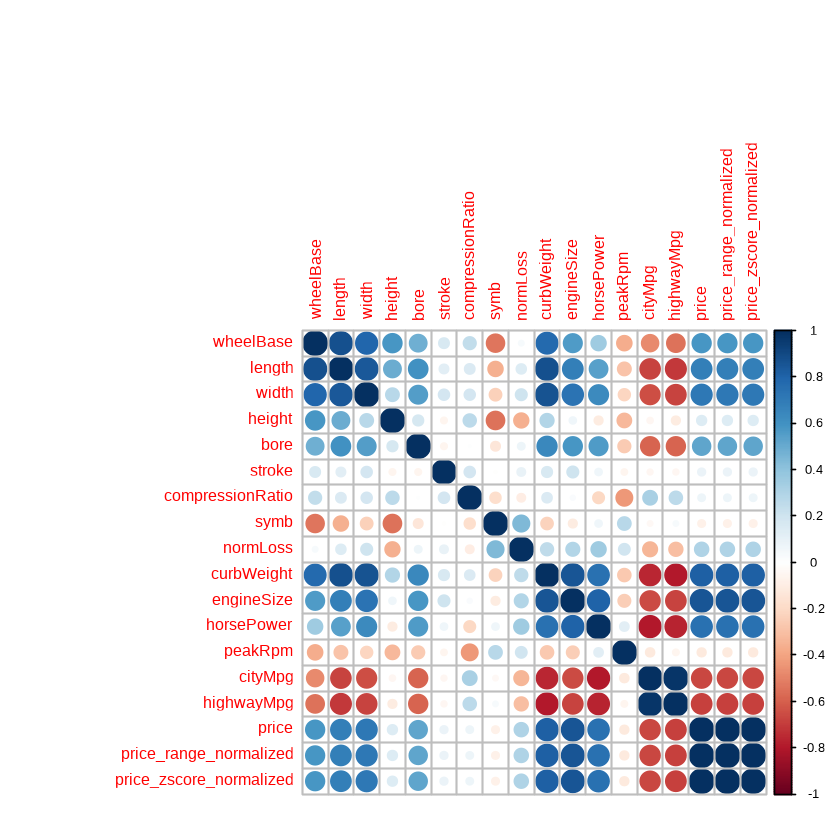

In [17]:
# Select the numeric attributes
numeric_attributes <- select_if(car_insurance, is.numeric)
# Create a correlation matrix
correlation_matrix <- cor(numeric_attributes)

# Calculate the p-values and confidence intervals of the correlation coefficient for each pair of variables
p_values <- cor.mtest(correlation_matrix)$p.value
confidence_intervals <- cor.mtest(correlation_matrix)$conf.int

# Plot the correlation matrix
corrplot(correlation_matrix, method = "circle", p.mat = p_values, sig.level = 0.05, insig = "blank")

### 5. Load the data set USJudgeRatings, from the datasets package, containing lawyers’ ratings of state judges in the US Superior Court regarding a set of attributes.

In [18]:
# Load the datasets package
library(datasets)

# Load the USJudgeRatings data set
data(USJudgeRatings)
head(USJudgeRatings)
diagnose(USJudgeRatings)

,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8
"BURNS,E.B.",6.2,8.8,8.7,8.5,7.9,8.0,8.1,8.0,8.0,8.0,8.6,8.6


variables,types,missing_count,missing_percent,unique_count,unique_rate
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>
CONT,numeric,0,0,24,0.5581395
INTG,numeric,0,0,23,0.5348837
DMNR,numeric,0,0,26,0.6046512
DILG,numeric,0,0,26,0.6046512
CFMG,numeric,0,0,23,0.5348837
DECI,numeric,0,0,24,0.5581395
PREP,numeric,0,0,26,0.6046512
FAMI,numeric,0,0,27,0.6279070
ORAL,numeric,0,0,28,0.6511628


(a) Apply the function prcomp() to obtain the principal components. Inspect how each variable is 
obtained by the linear combination of each component.

In [19]:
# Apply the prcomp() function to obtain the principal components
pc <- prcomp(USJudgeRatings, scale = TRUE)

# Inspect how each variable is obtained by the linear combination of each component
pc$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
CONT,0.003075143,-0.932890644,0.334756548,0.058576867,0.093438368,-0.004064432,0.005214784,-6.006597e-02,0.02514533,-0.03038881,0.0145329260,-0.007940919
INTG,-0.288550775,0.182040993,0.549360126,0.173977074,-0.014543880,0.369937339,-0.449810741,3.341645e-01,0.27537794,0.10897641,-0.1125535650,0.009848658
DMNR,-0.286884206,0.197565743,0.556490386,-0.124412022,-0.228832817,-0.394724667,0.466747889,-2.470974e-01,0.19910004,-0.07241282,0.1343234234,0.059121657
DILG,-0.304354091,-0.036304667,-0.163629910,0.321395544,-0.301936920,0.598676072,0.209710731,-3.548587e-01,-0.03977180,-0.38339165,0.0709517642,0.053790339
CFMG,-0.302572733,-0.168393523,-0.207341904,0.012949223,-0.448430522,-0.085728870,0.246903359,7.135261e-01,-0.14342471,0.09850310,0.1658680927,0.025082947
DECI,-0.301891969,-0.127877299,-0.297902771,0.030491779,-0.424003128,-0.392609484,-0.536429933,-3.024227e-01,0.25823773,0.06743847,-0.1284999526,0.044141604
PREP,-0.309406446,-0.032230248,-0.151869345,0.213656069,0.202853400,0.083216652,0.335390036,-1.536754e-01,0.10876864,0.67986284,-0.3187612119,-0.273286884
FAMI,-0.306679527,0.001315183,-0.195290454,0.200651140,0.507470003,-0.101538704,-0.036378004,2.038889e-02,0.22306628,0.04004599,0.5733628652,0.421739844
ORAL,-0.312708348,0.003625720,-0.002150634,-0.007441042,0.246059421,-0.150272440,0.057580177,9.062990e-02,-0.29951714,-0.25599455,-0.6386061655,0.494391025
WRIT,-0.311061231,0.031378756,-0.056045596,0.137104995,0.305562842,-0.238172386,-0.060899994,1.261203e-01,-0.02497324,-0.47478254,0.0004056397,-0.696107204


(b) Load the package ggbiplot and plot the two first components with the function ggbiplot(). You can 
label each point with the lawyer’s name by setting the labels parameter

Warning message in plot.window(...):
“"var.col" is not a graphical parameter”
Warning message in plot.window(...):
“"var.cex" is not a graphical parameter”
Warning message in plot.window(...):
“"point.size" is not a graphical parameter”
Warning message in plot.window(...):
“"alpha" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"var.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"var.cex" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"point.size" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"alpha" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"var.col" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"var.cex" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"point.size" is not a graphical parameter”
Warning message i

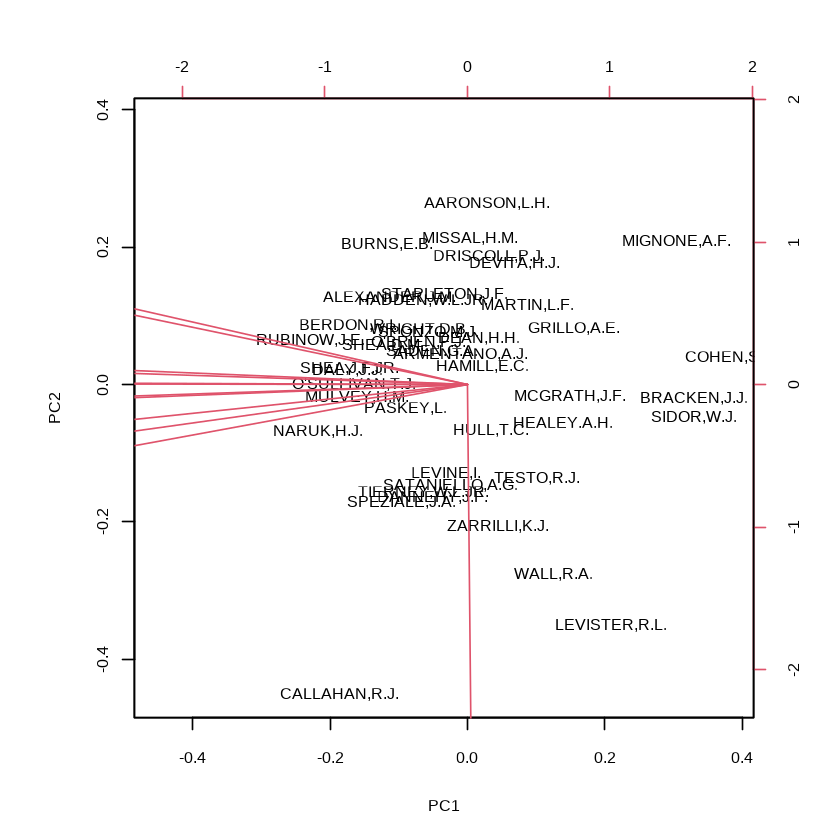

In [20]:
# Load the package stats
library(stats)

# Plot the biplot
biplot(pc, 
       expand = 3, 
       var.col = "blue", 
       var.cex = 0.7, 
       point.size = 2, 
       alpha = 0.5)